<a href="https://colab.research.google.com/github/willyptrain/cs4774-mask-detection/blob/main/face_detection_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

# !unzip 'drive/My Drive/wider_face_split' 
# !unzip 'drive/My Drive/WIDER_train' -d '/content/WIDER_train'
# !unzip 'drive/My Drive/WIDER_val' -d '/content/WIDER_val'
# !unzip 'drive/My Drive/WIDER_test'



Mounted at /content/drive/


In [2]:


# Machine Learning Homework 4 - Image Classification

__author__ = 'wcp7cp'

# General imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import os
import sys
import pandas as pd

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

import scipy.io as sio
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import cv2


In [25]:
# import shutil
# shutil.rmtree("darknet")

In [9]:
yolo_weights = "/content/drive/My Drive/yolov3.weights"
yolo_cfg = "/content/drive/My Drive/wider_face_yolov3.cfg"
object_data = "/content/drive/My Drive/obj.data"
train_annotations  = "/content/drive/My Drive/train_annotations.txt"
valid_annotations  = "/content/drive/My Drive/val_annotations.txt"
train_files = "/content/drive/My Drive/train_files.txt"
val_files = "/content/drive/My Drive/val_files.txt"

annotation_directory = "/content/drive/My Drive/data/"

!git clone https://github.com/AlexeyAB/darknet.git


!cp "/content/drive/My Drive/obj.data" "darknet/data/"
!cp "/content/drive/My Drive/train_files.txt" "darknet/data/"
!cp "/content/drive/My Drive/val_files.txt" "darknet/data/"


!cp "/content/drive/My Drive/WIDER_train.zip" "darknet/data/"
!cp "/content/drive/My Drive/WIDER_val.zip" "darknet/data/"

!unzip 'darknet/data/WIDER_train' -d 'darknet/data/WIDER_train'
!unzip 'darknet/data/WIDER_val' -d 'darknet/data/WIDER_val'

# train_data="".join(open("darknet/data/train_files.txt").readlines())
# val_data="".join(open("darknet/data/val_files.txt").readlines()[0:500])
# open("darknet/data/train_files.txt","w").writelines(train_data)
# open("darknet/data/val_files.txt","w").writelines(val_data)

2000


In [ ]:
!wget "https://pjreddie.com/media/files/darknet53.conv.74"
%cd darknet/
!make
%cd ..

--2020-11-11 17:30:21--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74    20%[===>                ]  32.05M   209KB/s    eta 10m 51s

In [ ]:
%cd darknet/
!./darknet detector train "../drive/My Drive/obj.data" "../drive/My Drive/wider_face_yolov3.cfg" "/content/darknet53.conv.74" #"../drive/My Drive/yolov3.weights" 
%cd ..

/content/darknet
 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
wider_face_yolov3
mini_batch = 2, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 1

Streaming output truncated to the last 5000 lines.
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.] 0.0 0
[0.

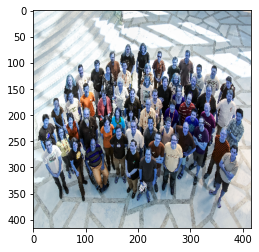

In [30]:

test_config = "drive/My Drive/wider_face_yolov3.cfg"
test_weights = "darknet/backup/wider_face_yolov3_final.weights"

net = cv2.dnn.readNetFromDarknet(test_config, test_weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
ln = net.getLayerNames()
print(len(ln), ln)
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

img = cv2.resize(cv2.imread("/content/drive/My Drive/test_people.jpg"), (416,416))
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=True)
r = blob[0, 0, :, :]

net.setInput(blob)
outputs = net.forward(ln)
plt.imshow(img)

#ADAPTED FROM: https://colab.research.google.com/drive/1dYwDAjSgzj_9MQEZ4Uu3nR_9K-4zlsqQ#scrollTo=Bn95xJWPL63i
def yolo(img):
    coco = "/content/drive/My Drive/coco.names"
    LABELS = open(coco).read().strip().split("\n")
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
        swapRB=True, crop=True)
    net.setInput(blob)
    layerOutputs = net.forward(ln)


    h_img = img.shape[0]
    w_img = img.shape[1]

    boxes = []
    confidences = []
    classIDs = []


    for output in layerOutputs:
        for detection in output:

            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            print(scores, confidence, classID)

            if confidence > .5:
                print(LABELS[classID], confidence)
   
                box = detection[0:4] * np.array([w_img, h_img, w_img, h_img])
                (centerX, centerY, w, h) = box.astype("int")

                x = int(centerX - (w / 2))
                y = int(centerY - (h / 2))

                print(x, y, int(w), int(h))
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, .5, .4 )
    if len(idxs) > 0:
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        for i in idxs.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in COLORS[classIDs[i]]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            rect = patches.Rectangle((x,y),x+w,y+h,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
            
        plt.show()

yolo(img)